## Capital Bike Share

**Washington, DC**

What has the effect of 2020 *events* been on bike share ridership?

data from https://www.capitalbikeshare.com/system-data

June 11, 2020

In [1]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
import datetime as dt

from pathlib import Path
import os

In [2]:
os.getcwd()

'/home/samuel/Documents/research/project-dc'

In [3]:
os.listdir('data')

['tlgdb_2018_dc.gdb',
 'capital-bikeshare',
 'demo-2013',
 'housing-2018',
 'trsnsp-2013',
 'transp-2018',
 'demo-2018',
 'housing-2013',
 'tlgdb_2013_dc.gdb']

In [13]:
# create list of filenames, 2020 data

folder = 'data/capital-bikeshare/2020/'
data_files = []

for ii in range(1,6):
    num = str(ii)
    data = folder + '20200'+ num + '-capitalbikeshare-tripdata.csv'
    data_files.append(data)

data_files

['data/capital-bikeshare/2020/202001-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202002-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202003-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202004-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202005-capitalbikeshare-tripdata.csv']

In [20]:
# and again for 2019 data...

folder = 'data/capital-bikeshare/2019/'

for ii in range(1,6):
    num = str(ii)
    data = folder + '20190'+ num + '-capitalbikeshare-tripdata.csv'
    data_files.append(data)

data_files

['data/capital-bikeshare/2020/202001-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202002-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202003-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202004-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2020/202005-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2019/201901-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2019/201902-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2019/201903-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2019/201904-capitalbikeshare-tripdata.csv',
 'data/capital-bikeshare/2019/201905-capitalbikeshare-tripdata.csv']

In [36]:
# Load dataframes into a list of dataframes...

bikes_dfs = []
for file in data_files:
    bikes_dfs.append(pd.read_csv(file))
    
print(len(bikes_dfs))

10


In [48]:
# add index columns...

for bikes in bikes_dfs:
    bikes = bikes.reset_index(inplace = True)

In [49]:
for bike in bikes_dfs:
    print(bike.shape)
    print(bike.columns, '\n')

(196969, 10)
Index(['index', 'Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object') 

(177901, 10)
Index(['index', 'Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object') 

(162530, 10)
Index(['index', 'Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object') 

(75249, 14)
Index(['index', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 

(148986, 15)
Index(['index', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
  

In [50]:
# want our date/time values under a common column name

for bikes in bikes_dfs:
    if 'Start date' in  bikes:
        bikes = bikes.rename(columns = {'Start date': 'started_at', 'End date': 'ended_at'}, inplace = True)
    else:
        pass

    
print(bikes_dfs[-1].shape, '\n', bikes_dfs[-1].columns)

(337704, 10) 
 Index(['index', 'Duration', 'started_at', 'ended_at', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')


In [51]:
# and convert those to datetime and add a column for just date

for bikes in bikes_dfs:
    
    bikes['started_at'] = pd.to_datetime(bikes['started_at'])
    bikes['ended_at'] = pd.to_datetime(bikes['ended_at'])
    bikes['date'] = bikes['started_at'].dt.date
    
    
print(bikes_dfs[2].head())

   index  Duration          started_at            ended_at  \
0      0      1596 2020-03-01 00:01:16 2020-03-01 00:27:52   
1      1       448 2020-03-01 00:02:04 2020-03-01 00:09:32   
2      2       283 2020-03-01 00:03:45 2020-03-01 00:08:28   
3      3       642 2020-03-01 00:05:49 2020-03-01 00:16:31   
4      4       347 2020-03-01 00:06:53 2020-03-01 00:12:40   

   Start station number          Start station  End station number  \
0                 31646  Maine Ave & 9th St SW               31509   
1                 31646  Maine Ave & 9th St SW               31272   
2                 31224         18th & L St NW               31200   
3                 31603          1st & M St NE               31611   
4                 31101         14th & V St NW               31114   

                            End station Bike number Member type        date  
0              New Jersey Ave & R St NW      W24217      Member  2020-03-01  
1  Washington & Independence Ave SW/HHS      W2189

In [54]:
# and to create new data frames for grouping dates and counts...
bikes_dates_dfs = []

for bikes in bikes_dfs:
    bikes = bikes.groupby('date')['index'].count().to_frame().reset_index()
    bikes_dates_dfs.append(bikes)

print(bikes_dates_dfs[1].head())

         date  index
0  2020-02-01   5717
1  2020-02-02   5289
2  2020-02-03   8744
3  2020-02-04   8202
4  2020-02-05   6877


In [55]:
for bikes in bikes_dates_dfs:
    print(bikes.shape)

(31, 2)
(29, 2)
(31, 2)
(30, 2)
(31, 2)
(31, 2)
(28, 2)
(31, 2)
(30, 2)
(31, 2)


In [58]:
# put them all together

all_bikes = pd.concat(bikes_dates_dfs)
all_bikes.shape

(303, 2)

/home/samuel/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


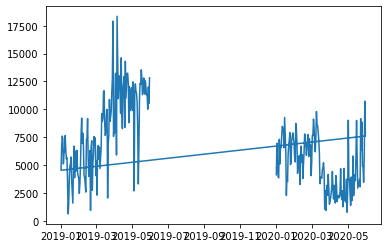

In [59]:
plt.plot(all_bikes['date'], all_bikes['index']);

In [65]:
# our 'date' field became not a date file type?? readjust:

all_bikes['date'] = pd.to_datetime(all_bikes['date'])

type(all_bikes.date[22])

pandas.core.series.Series

In [66]:
# and extract only month and year columns...

all_bikes['year'] = all_bikes['date'].dt.year
all_bikes['month'] = all_bikes['date'].dt.month

all_bikes.head()

,date,index,year,month
0,2020-01-01,4135,2020,1
1,2020-01-02,6969,2020,1
2,2020-01-03,5048,2020,1
3,2020-01-04,3979,2020,1
4,2020-01-05,3864,2020,1


In [67]:
# make some separate dataframes by year

bikes_2020 = all_bikes[all_bikes['year'] == 2020]
bikes_2019 = all_bikes[all_bikes['year'] == 2019]

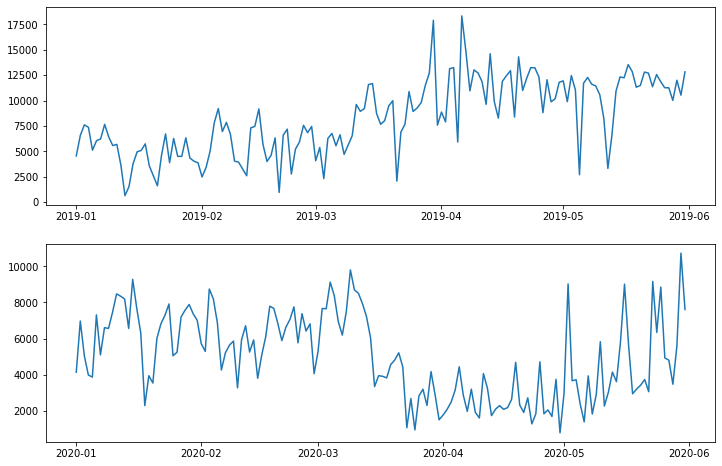

In [80]:
# by year, but separately

fig, ax = plt.subplots(2,1, figsize = (12,8))
ax[0].plot(bikes_2019['date'], bikes_2019['index'])
ax[1].plot(bikes_2020['date'], bikes_2020['index']);